This notebook replicates Jake VanderPlas' [post](http://jakevdp.github.io/blog/2018/09/13/waiting-time-paradox/) on the bus paradox. 

# Background

The bus paradox is a special case of the [inspection paradox](https://towardsdatascience.com/the-inspection-paradox-is-everywhere-2ef1c2e9d709), which – as VanderPlas succinctly summarises – occurs whenever the probability of observing a quantity is related to the quantity being observed. For example: if you sample random students on campus and ask them about the size of their classes you'll probably get a larger number than if you asked the collge administrator, because you're likely to oversample students from large classes. Similarly, you are more likely to arrive at a bus stop during a longer waiting time simply because the waiting time is longer. 

However, the waiting time paradox claims not only that the experienced waiting time is longer than the average waiting time, but that it is twice as long. 

# Simulating waiting times

In [3]:
# Simulate bus arrivals

from waiting_time_paradox.toolbox import simulate_bus_arrivals

In [4]:
bus_arrival_tims = simulate_bus_arrivals()

NameError: name 'rand' is not defined

Object `random` not found.


In [8]:
# Simulate bus arrival times

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n = 1000000  # Number of buses
tau = 10     # Average number of minutes between arrivals

rand = np.random.RandomState(231286)    # Random seed
bus_arrival_times = n * tau * np.sort(rand.rand(n))

9.999999772362848

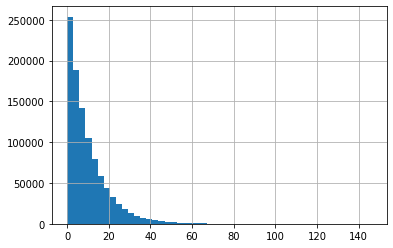

In [9]:
# Check that interval between arrival is about tau on average 

intervals = np.diff(bus_arrival_times)
pd.Series(intervals).hist(bins=50)
intervals.mean()

In [10]:
def simulate_wait_times(arrival_times,
                        rseed=231286,
                        n_passengers = 1000000):
    rand = np.random.RandomState(rseed)

    # Simulate customer arrival times
    arrival_times = np.asarray(bus_arrival_times)
    passenger_times = arrival_times.max() * rand.rand(n_passengers)

    # Find the index of teh next bus for each simulated customer
    i = np.searchsorted(arrival_times, passenger_times, side='right')
    
    return arrival_times[i] - passenger_times

wait_times = simulate_wait_times(bus_arrival_times)
wait_times.mean()

3.4527030796581752

In [11]:
bus = [4, 5, 6]
np.searchsorted(bus, 4.999, side='left')

1